# Project 1 - Group 6
###### <font color='gray'>Authors: Aisha Baitemoriva-Othman, Adonis McQueen, Angela Kim, Deja Prade, James Kang</font>

In [2]:
## Import libraries ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## Import datasets ##

# Aisha's datasets: Rotten Tomatoes
df_rt_movie_info = pd.read_csv('data/rt.movie_info.tsv.gz',sep='\t')
df_rt_reviews = pd.read_csv('data/rt.reviews.tsv.gz',sep='\t',encoding='latin1')

# Adonis's dataset: Box Office Mojo
df_gross = pd.read_csv("data/bom.movie_gross.csv.gz")

# Angela's dataset: The Numbers
mb = pd.read_csv('data/tn.movie_budgets.csv.gz')

# Deja's dataset: TMDB
movie_type = pd.read_csv('data/tmdb.movies.csv.gz')

# James's datasets: IMDB
title_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
title_akas = pd.read_csv('data/imdb.title.akas.csv.gz')

## Questions
<ul>
</ul>
<li>Which movies have the highest gross values?
<li>What are the domestic and worldwide profits?
<li>What is the trend of movie genres over time?
<li>How has average movie runtime changed over time?

----

## Angela's Data Analysis:

In [ ]:
## Preliminary analysis
mb.head(10)

In [ ]:
## Check datatypes and look for any missing values
mb.info()

**Observations and Insights:**
<ul>
<li>There are 5782 total entries with 0 missing values.
<li>The release date column is the object datatype and should be changed to the datetime datatype.
<li>The production budget, domestic gross, and worldwide gross columns are also object datatypes and should be changed to integer.
</ul>

In [ ]:
## Change release_date to datetime
mb['release_date'] = pd.to_datetime(mb['release_date'])

## Change production_budget, domestic_gross, and worldwide_gross to integer

mb['production_budget'] = mb['production_budget'].str.replace( ',' , '')
mb['production_budget'] = mb['production_budget'].str.replace( '$' , '')
mb['production_budget'] = pd.to_numeric(mb['production_budget'])

mb['domestic_gross'] = mb['domestic_gross'].str.replace( ',' , '')
mb['domestic_gross'] = mb['domestic_gross'].str.replace( '$' , '')
mb['domestic_gross'] = pd.to_numeric(mb['domestic_gross'])

mb['worldwide_gross'] = mb['worldwide_gross'].str.replace( ',' , '')
mb['worldwide_gross'] = mb['worldwide_gross'].str.replace( '$' , '')
mb['worldwide_gross'] = pd.to_numeric(mb['worldwide_gross'])


## Check that all changes have been correctly made
mb.info()

In [ ]:
## Remove rows with release_date before 2010 to focus on analyzing data from the most recent decade

mb = mb[(mb['release_date']) >= '2010-01-01']

mb.head(30)

In [ ]:
mb.tail(30)

**Observations & Insights:**
<ul>
<li>There are a lot of gross values that are 0. They also tend to correlate with movies with very small production budgets.
<li>Upon investigation, these films are usually independently made and don't apply to a large corporation like Microsoft.
</ul>

In [ ]:
## Create two new columns for domestic profit and worldwide profit
## Remove rows with negative profits

mb['domestic_profit'] = (mb['domestic_gross'] - mb['production_budget'])
mb['worldwide_profit'] = (mb['worldwide_gross'] - mb['production_budget'])
mb.head(30)

**Observations & Insights:**
<ul>
<li>There are films that are box office bombs such as Dark Phoenix, The Lone Ranger, and Pirates of the Caribbean: On Strangers Tides. Their production budgets overshadowed their box office revenues.
</ul>

In [ ]:
## Sort by highest domestic profits

mb_dp = mb.sort_values(by=['domestic_profit'], ascending=False)
mb_dp.reset_index(inplace=True)

## Sort by highest worldwide profits

mb_wp = mb.sort_values(by=['worldwide_profit'], ascending=False)
mb_wp.reset_index(inplace=True)

In [ ]:
## Bar chart of Top 20 Movies with Highest Domestic Profits

fig, ax = plt.subplots(figsize=(12,7))

x1 = mb_dp['movie'][0:20]
y1 = mb_dp['domestic_profit'][0:20]

ax = sns.barplot(x=y1, y=x1, palette='flare_r')
ax.set(xlabel='Domestic Profits (in millions)', ylabel='Movies', title='Top 20 Movies with Highest Domestic Profits');

In [ ]:
## Bar chart of Top 20 Movies with Highest Worldwide Profits

fig, ax = plt.subplots(figsize=(12,7))

x2 = mb_wp['movie'][0:20]
y2 = mb_wp['worldwide_profit'][0:20]

ax = sns.barplot(x=y2, y=x2, palette='flare_r')
ax.set(xlabel='Worldwide Profits (in billions)', ylabel='Movies', title='Top 20 Movies with Highest Worldwide Profits');

**Final Observations & Insights:**
<ul>
    <li>The 10 movies with highest domestic profits from 2010-mid2019 are <b><i>Star Wars Ep. VII: The Force Awakens, Black Panther, Jurassic World, Incredibles 2, The Avengers, Avengers: Infinity War, Beauty and the Beast, Rogue One: A Star Wars Story, The Hunger Games, and Jumanji: Welcome to the Jungle.</i></b>
    <li>The 10 movies with highest worldwide profits from 2010-mid2019 are <b><i>Avengers: Infinity War, Star Wars Ep. VII: The Force Awakens, Jurassic World, Furious 7, The Avengers, Harry Potter and the Deathly Hallows: Part II, Black Panther, Jurassic World: Fallen Kingdom, Frozen, and Beauty and the Beast.</i></b>
    <li>The most frequently occuring genres of the top 20 films are <b><i>Sci-fi, Action, Adventure, Animation, and Superhero.</i></b>
    <li>The majority of these films are part of the <b><i>Marvel</i></b> or <b><i>Star Wars</i></b> franchises.
    <li>There has also been a huge focus on revitalizing or reimagining classics such as <b><i>Jurassic Park, James Bond, and Jumanji.</i></b>
    <li>Many financially successful films are sequels such as <b><i>Star Wars Ep. VII, Avengers: Infinity War, Furious 7, Harry Potter and the Deathly Hallows: Parts I & II, and Incredibles 2</b></i>
</ul>

----

## Aisha's Data Analysis:

In [4]:
df_rt_movie_info.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


In [5]:
df_rt_movie_info.shape

(1560, 12)

In [6]:
# Remove the month and day from the theater_date and create a new column with just the year of the release date
df_rt_movie_info['new_theater_date'] = df_rt_movie_info.theater_date.str[-4:]

In [7]:
# Convert the values in the 'new_theater_date' column from strings to integers
df_rt_movie_info['new_theater_date'] = df_rt_movie_info['new_theater_date'].apply(pd.to_numeric)

In [8]:
df_rt_movie_info.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,new_theater_date
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,1971.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2012.0
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,1996.0


**Observations & Insights**
<ul>
</ul>
<li>There are 494 out of 1560 rows that have a missing studio value

In [9]:
df_rt_movie_info['studio'].isna().value_counts()

True     1066
False     494
Name: studio, dtype: int64

In [10]:
# All the studios listed
df_rt_movie_info['studio'].value_counts().head() 

Universal Pictures        35
Paramount Pictures        27
20th Century Fox          26
Sony Pictures Classics    22
Warner Bros. Pictures     21
Name: studio, dtype: int64

In [11]:
df_rt_reviews.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [12]:
df_rt_reviews[df_rt_reviews['rating'].isna()]

,id,review,rating,fresh,critic,top_critic,publisher,date
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
...,...,...,...,...,...,...,...,...
54409,2000,"A lightweight, uneven action comedy that freel...",NaN,rotten,Daniel Eagan,0,Film Journal International,"October 5, 2002"
54417,2000,"The funny thing is, I didn't mind all this con...",NaN,fresh,Andrew Sarris,1,Observer,"October 2, 2002"
54425,2000,Despite Besson's high-profile name being Wasab...,NaN,fresh,Andy Klein,0,New Times,"September 26, 2002"
54426,2000,The film lapses too often into sugary sentimen...,NaN,rotten,Paul Malcolm,1,L.A. Weekly,"September 26, 2002"


In [16]:
# remove all rows that have a null value in the 'rating' column
df_rt_reviews = df_rt_reviews[df_rt_reviews['rating'].notna()]
df_rt_reviews.shape

(40915, 10)

In [17]:
df_rt_reviews.loc[df_rt_reviews ['rating'] == 'T']

,id,review,rating,fresh,critic,top_critic,publisher,date,fn,sn
47013,1765,"upposed to be a horror-comedy film, but it's n...",T,rotten,Jeff Vice,0,Deseret News (Salt Lake City),"January 1, 2000",T,None


In [13]:
# Split the "rating" column into two separate columns, separating them on "/" if the rating is not a letter
df_rt_reviews[['fn','sn']] = df_rt_reviews['rating'].str.split('/',expand=True)

In [14]:
df_rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date,fn,sn
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3,5
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",NaN,NaN
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",NaN,NaN
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",NaN,NaN
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017",NaN,NaN


In [18]:
# replace the null values in the 'sn'(second number) with number 1. The row of the column 'sn' has a null value 
# only if the corresponding 'rating' column has a letter rating.
df_rt_reviews['sn'] = df_rt_reviews.sn.apply(lambda x: x if not pd.isnull(x) else 1)

In [19]:
# The letters we have: A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F+,F,F-
# A+ gets 1, A gets 93.34, A- gets 86.68, B+ gets 80.02, B gets 73.36, B- gets 66.7, 
#C+ gets 60.04
# C gets 53.38, C- gets 46.72, D+ gets 40.06, D gets 33.4, D- gets 26.74
# F+ gets 20.08, F gets 13.42, F- gets 6.66

In [20]:
# replacing the letter ratings with the appropriate percentage explained in the above cell
df_rt_reviews['fn'] = df_rt_reviews['fn'].replace(['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F+','F','F-'],[1,0.9334,0.8668,0.8002,0.7336,0.667,0.6004,0.5338,0.4672,0.4006,0.334,0.2674,0.2008,0.1342,0.666])

In [21]:
# deleting a row with an outlier value in the 'fn' column which is giving an error 
# when trying to convert all string values into numeric values
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != 'N']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != 'R']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != '1-5']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != 'T']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != '3 1']

In [22]:
# Convert all string values in the 'fn' and 'sn' columns into numeric values
df_rt_reviews['fn'] = df_rt_reviews['fn'].apply(pd.to_numeric)
df_rt_reviews['sn'] = df_rt_reviews['sn'].apply(pd.to_numeric)

In [23]:
df_rt_reviews['new_rating'] = df_rt_reviews.apply(lambda row: row.fn/row.sn, axis=1)

In [24]:
# Delete rows that have a new_rating value higher than 1
df_rt_reviews = df_rt_reviews[df_rt_reviews.new_rating <=1]

In [25]:
df_rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date,fn,sn,new_rating
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3.0000,5,0.6000
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",0.5338,1,0.5338
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2.0000,5,0.4000
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013",0.6670,1,0.6670
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",2.0000,4,0.5000


In [26]:
# Create a new dataset with only 'id' and 'new_rating' columns of the 'df_rt_reviews' dataset
# so we can merge it later on with the 'df_rt_movie_info' dataset.
new_rt_reviews = pd.DataFrame(zip(df_rt_reviews.id, df_rt_reviews.new_rating))

In [37]:
# Rename the columns back to original names
new_rt_reviews.rename(columns={0: 'id', 1: 'rating'}, inplace=True)

In [28]:
new_rt_reviews.head()

,id,rating
0,3,0.6000
1,3,0.5338
2,3,0.4000
3,3,0.6670
4,3,0.5000


In [29]:
df_rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,new_theater_date
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,1971.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2012.0
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,1996.0
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,1994.0
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN,NaN


In [38]:
new_rt_movie_info= pd.DataFrame(zip(df_rt_movie_info.id, df_rt_movie_info.genre,df_rt_movie_info.runtime,df_rt_movie_info.new_theater_date))

In [39]:
new_rt_movie_info.head()

,0,1,2,3
0,1,Action and Adventure|Classics|Drama,104 minutes,1971.0
1,3,Drama|Science Fiction and Fantasy,108 minutes,2012.0
2,5,Drama|Musical and Performing Arts,116 minutes,1996.0
3,6,Drama|Mystery and Suspense,128 minutes,1994.0
4,7,Drama|Romance,200 minutes,NaN


In [40]:
# Rename the columns back to original names
new_rt_movie_info.rename(columns={0: 'id', 1: 'genres',2: 'runtime',3:'release_year'}, inplace=True)

In [41]:
new_rt_movie_info.head()

,id,genres,runtime,release_year
0,1,Action and Adventure|Classics|Drama,104 minutes,1971.0
1,3,Drama|Science Fiction and Fantasy,108 minutes,2012.0
2,5,Drama|Musical and Performing Arts,116 minutes,1996.0
3,6,Drama|Mystery and Suspense,128 minutes,1994.0
4,7,Drama|Romance,200 minutes,NaN


In [43]:
# left joining the new_rt_movie_info to new_rt_reviews
merged_datasets = pd.merge(new_rt_reviews,new_rt_movie_info,on='id',how='left')

In [44]:
merged_datasets.head()

,id,rating,genres,runtime,release_year
0,3,0.6000,Drama|Science Fiction and Fantasy,108 minutes,2012.0
1,3,0.5338,Drama|Science Fiction and Fantasy,108 minutes,2012.0
2,3,0.4000,Drama|Science Fiction and Fantasy,108 minutes,2012.0
3,3,0.6670,Drama|Science Fiction and Fantasy,108 minutes,2012.0
4,3,0.5000,Drama|Science Fiction and Fantasy,108 minutes,2012.0


In [45]:
# first step in splitting the genres of each row into separate rows for each genre of each movie: 
# we are creating a list out of each genres string such as this: 'Action and Adventure|Classics|Drama'
merged_datasets['genres']=merged_datasets['genres'].str.split('|')

In [46]:
# second step in splitting the genres of each row into separate rows for each genre of each movie: 
merged_datasets = merged_datasets.explode('genres')

In [47]:
# getting rid of text characters in the 'runtime' column 
merged_datasets['runtime'] = merged_datasets['runtime'].str.replace(' minutes','')

In [48]:
# Convert the 'runtime' column's string values into floats
merged_datasets['runtime'] = pd.to_numeric(merged_datasets['runtime'])

In [49]:
merged_datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88969 entries, 0 to 40284
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            88969 non-null  int64  
 1   rating        88969 non-null  float64
 2   genres        88896 non-null  object 
 3   runtime       87648 non-null  float64
 4   release_year  87190 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.1+ MB


### movie genre trends over the years

In [50]:
merged_datasets['genres'].value_counts()

Drama                          24708
Comedy                         16177
Action and Adventure            9687
Mystery and Suspense            8717
Romance                         6000
Science Fiction and Fantasy     5442
Kids and Family                 3483
Art House and International     3304
Horror                          3179
Animation                       2009
Musical and Performing Arts     1558
Classics                        1531
Western                          899
Documentary                      845
Special Interest                 644
Sports and Fitness               313
Television                       158
Faith and Spirituality           149
Cult Movies                       38
Gay and Lesbian                   31
Anime and Manga                   24
Name: genres, dtype: int64

In [51]:
merged_datasets = merged_datasets[merged_datasets['release_year']>1999]

In [52]:
merged_datasets['release_year'].value_counts()

2003.0    5130
2002.0    4823
2004.0    4587
2007.0    4438
2005.0    4323
2011.0    4311
2009.0    4271
2000.0    3947
2006.0    3780
2010.0    3670
2008.0    3496
2018.0    2884
2012.0    2870
2001.0    2515
2016.0    2472
2014.0    2338
2015.0    2323
2017.0    1776
2013.0    1543
Name: release_year, dtype: int64

In [53]:
merged_datasets_drama = merged_datasets[merged_datasets['genres']=='Drama']

In [54]:
merged_datasets_comedy = merged_datasets[merged_datasets['genres']=='Comedy']

In [55]:
merged_datasets_action_adv= merged_datasets[merged_datasets['genres']=='Action and Adventure']

In [56]:
merged_datasets_animation= merged_datasets[merged_datasets['genres']=='Animation']

In [57]:
merged_datasets_romance= merged_datasets[merged_datasets['genres']=='Romance']

In [58]:
df_drama = merged_datasets_drama.groupby('release_year')['genres'].value_counts()

In [59]:
df_comedy = merged_datasets_comedy.groupby('release_year')['genres'].value_counts()

In [60]:
df_action_adv = merged_datasets_action_adv.groupby('release_year')['genres'].value_counts()

In [61]:
df_animation = merged_datasets_animation.groupby('release_year')['genres'].value_counts()

In [62]:
df_romance = merged_datasets_romance.groupby('release_year')['genres'].value_counts()

In [63]:
mylist_drama = df_drama.to_list()

In [64]:
mylist_comedy = df_comedy.to_list()

In [65]:
mylist_action_adv = df_action_adv.to_list()

In [66]:
mylist_action_adv = [528,241,504,385,598,916,607,534,566,451,435,501,516,25,0,112,131,11,366]

In [67]:
mylist_animation = df_animation.to_list()

In [68]:
mylist_animation = [85, 76, 99, 53, 160, 66, 71, 129, 189, 164, 16, 213,0,0,0, 48, 234, 39, 92]

In [69]:
mylist_romance = df_romance.to_list()

In [70]:
mylist_romance = [141,175,498,428,154,458,248,410,307,119,480,334,0,65,94,248,147,165,170]

In [71]:
years_list = list(range(2000,2019))

In [72]:
from matplotlib.pyplot import figure

Text(0, 0.5, 'number of movies produced')

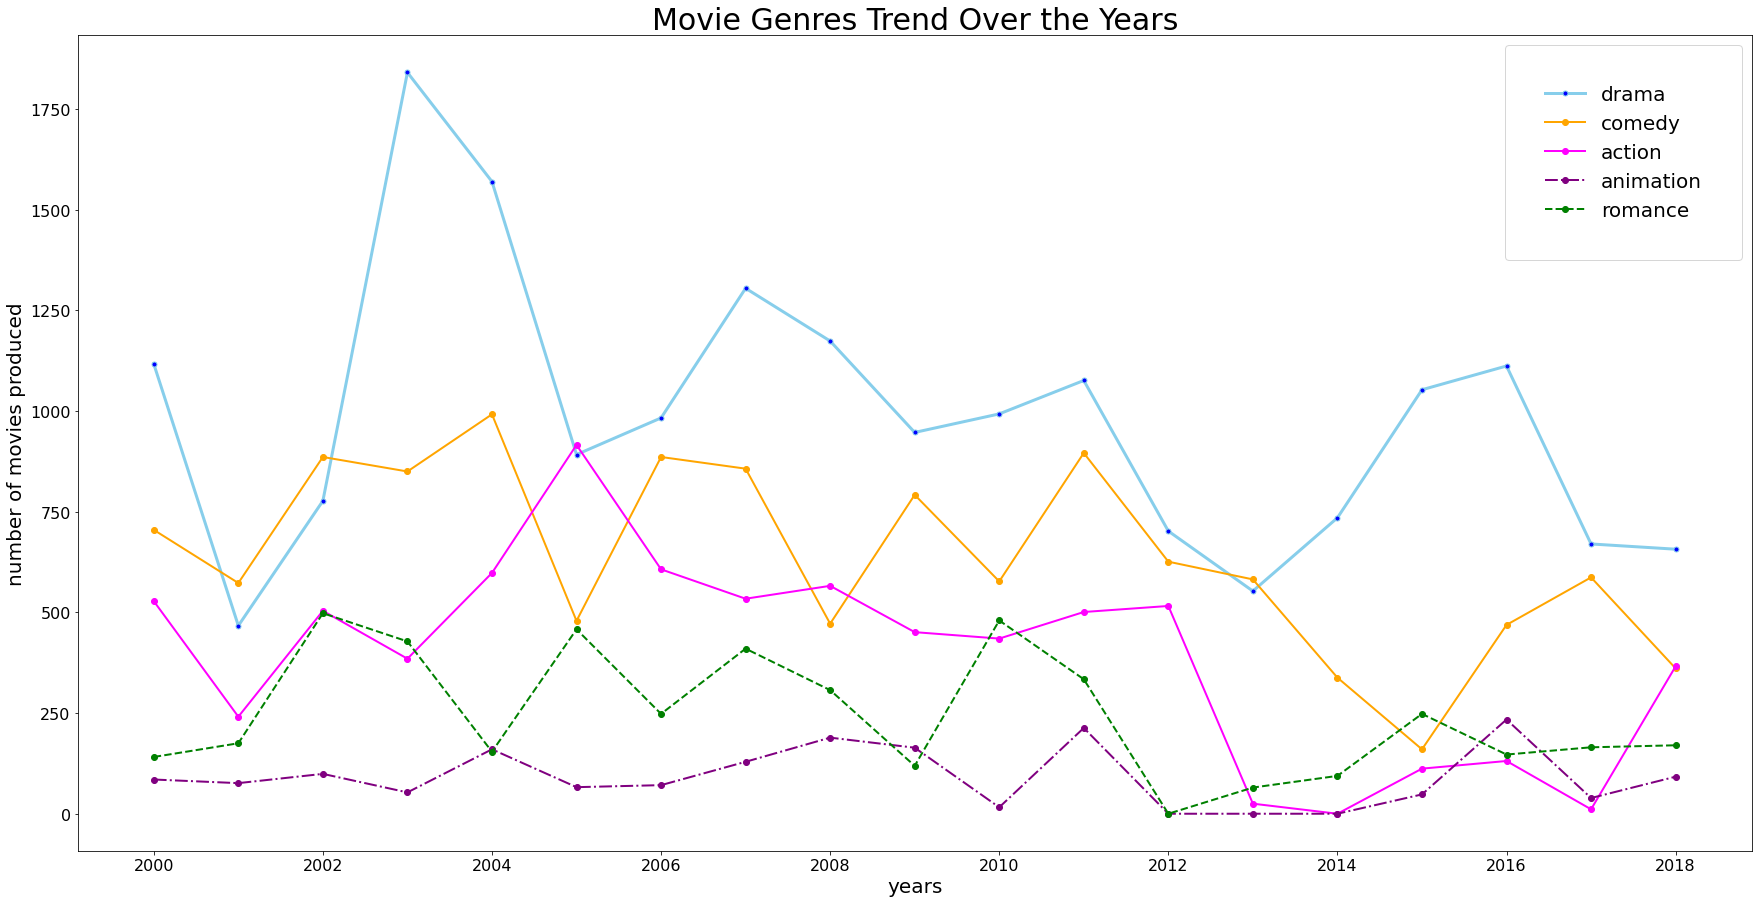

In [73]:
plt.figure(figsize=(30, 15))
plt.plot( years_list, mylist_drama, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=3,label="drama")
plt.plot( years_list, mylist_comedy, marker='o', color='orange', linewidth=2,label = 'comedy')
plt.plot( years_list, mylist_action_adv, marker='o', color='fuchsia', linewidth=2, linestyle='solid', label="action")
plt.plot( years_list, mylist_animation, marker='o', color='purple', linewidth=2, linestyle='dashdot', label="animation")
plt.plot( years_list, mylist_romance, marker='o', color='green', linewidth=2,linestyle='dashed', label = 'romance')
plt.legend(borderpad = 2,prop={"size":20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.locator_params(axis="x", nbins=10)
plt.title("Movie Genres Trend Over the Years", fontsize=30)
plt.xlabel("years",fontsize=20)
plt.ylabel("number of movies produced",fontsize=20)



In [79]:
merged_datasets['genres'].value_counts()
# the value count of movies by genre. The last four genre categories are too low in numbers compared to
# other movie genres
# We think it is best to remove them from our dataset

Drama                          18624
Comedy                         12088
Action and Adventure            7427
Mystery and Suspense            6439
Romance                         4641
Science Fiction and Fantasy     3722
Kids and Family                 2690
Horror                          2381
Art House and International     2250
Animation                       1734
Musical and Performing Arts     1051
Documentary                      650
Western                          578
Special Interest                 450
Sports and Fitness               257
Classics                         238
Television                       132
Faith and Spirituality           127
Anime and Manga                   18
Name: genres, dtype: int64

**Observations & Insights:**
<ul>
</ul>
<li>The last four genre categories are too low in numbers compared to other movie genres.
<li>We think it is best to remove them from our dataset.

In [74]:
# Create a list of genres that are not statistically significant
not_significant_genres_list = ['Anime and Manga','Gay and Lesbian','Cult Movies','Faith and Spirituality','Television','Sports and Fitness','Documentary','Western','Special Interest']

In [75]:
# Delete the not statistically insignificant genres from the dataset and creating a new dataset without those genres
new_merged_datasets = merged_datasets[~merged_datasets.genres.isin(not_significant_genres_list)]

In [76]:
# Find the mean of runtime for each genre
average_runtime_per_genre = new_merged_datasets.groupby('genres', as_index=False)['runtime'].mean()
average_runtime_per_genre

,genres,runtime
0,Action and Adventure,112.473344
1,Animation,94.171280
2,Art House and International,111.512444
3,Classics,176.436975
4,Comedy,102.869470
5,Drama,113.574733
6,Horror,101.153846
7,Kids and Family,100.543093
8,Musical and Performing Arts,110.934348
9,Mystery and Suspense,111.593186


In [81]:
# rename the 'runtime' column into the 'mean_runtime'
average_runtime_per_genre.rename(columns={'runtime': 'mean_runtime'}, inplace=True)

In [77]:
# Find the mean of the ratings for each genre
average_rating_per_genre = new_merged_datasets.groupby('genres', as_index=False)['rating'].mean()
average_rating_per_genre

,genres,rating
0,Action and Adventure,0.610588
1,Animation,0.636965
2,Art House and International,0.690348
3,Classics,0.600697
4,Comedy,0.610432
5,Drama,0.652974
6,Horror,0.535693
7,Kids and Family,0.620816
8,Musical and Performing Arts,0.616709
9,Mystery and Suspense,0.620616


In [82]:
# rename the "rating" column into the 'mean_rating'
average_rating_per_genre.rename(columns={'rating': 'mean_rating'}, inplace=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

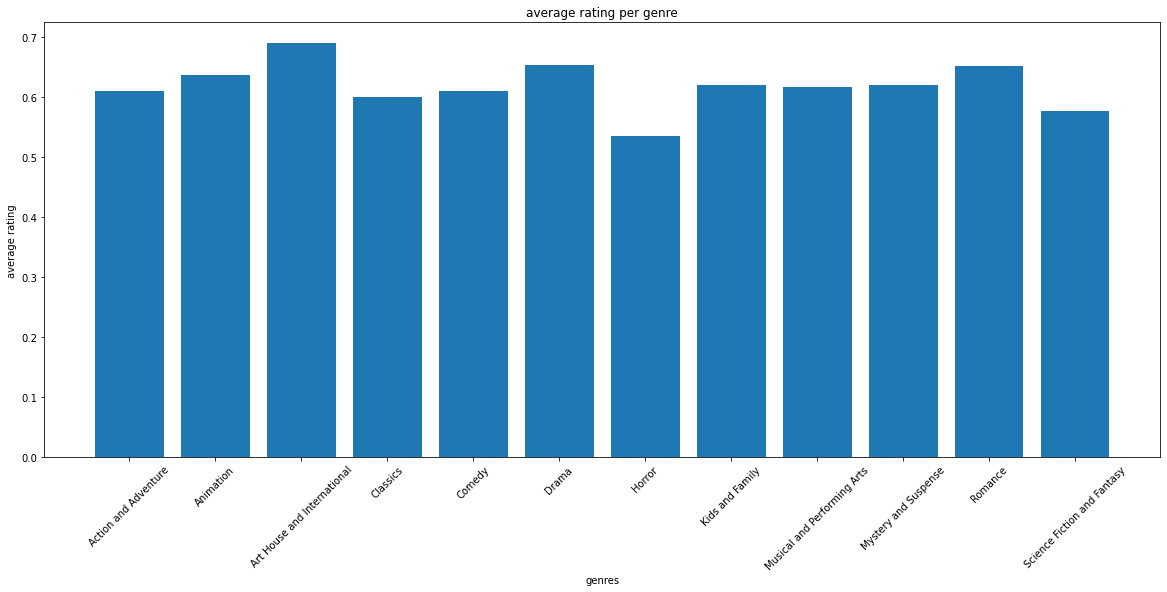

In [83]:
fig, ax1 = plt.subplots(figsize = (20,8))
x1 = average_rating_per_genre['genres']
y1 = average_rating_per_genre['mean_rating']
ax1.bar(x1,y1)
ax1.set_title('average rating per genre')
ax1.set_xlabel('genres')
ax1.set_ylabel('average rating')
plt.xticks(rotation = 45)

**Observations & Insights:**
<ul>
</ul>
The 4 genres that have the highest average ratings:
        <li> Romance </li>
        <li> Art House and International </li>
        <li> Drama </li>
        <li> Mystery and Suspense </li>

In [84]:
# Create a list of the four genres with the highest rating
four_genres_list = ['Romance','Art House and International','Drama','Mystery and Suspense']

In [85]:
# Create a dataset with only the four genres with the highest ratings
highest_rating_genres_dataset = merged_datasets[merged_datasets.genres.isin(four_genres_list)]

In [86]:
highest_rating_genres_dataset['genres'].value_counts()

Drama                          18624
Mystery and Suspense            6439
Romance                         4641
Art House and International     2250
Name: genres, dtype: int64

In [87]:
# The mean of runtime for the four highest rated genres
highest_rating_genres_dataset['runtime'].mean()

112.90897943784192

In [88]:
# Standard deviation from the mean for the four highest rated genres
highest_rating_genres_dataset['runtime'].std()

23.30271289125376

In [89]:
# Get an average runtime for each of the four highest rating genres
avg_runtime_high_rating_genres = highest_rating_genres_dataset.groupby('genres', as_index=False)['runtime'].mean()

In [90]:
# Rename the 'runtime' column of the new dataset into the "mean_runtime" 
avg_runtime_high_rating_genres.rename(columns={'runtime': 'mean_runtime'}, inplace=True)

In [91]:
avg_runtime_high_rating_genres

,genres,mean_runtime
0,Art House and International,111.512444
1,Drama,113.574733
2,Mystery and Suspense,111.593186
3,Romance,112.731308


([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

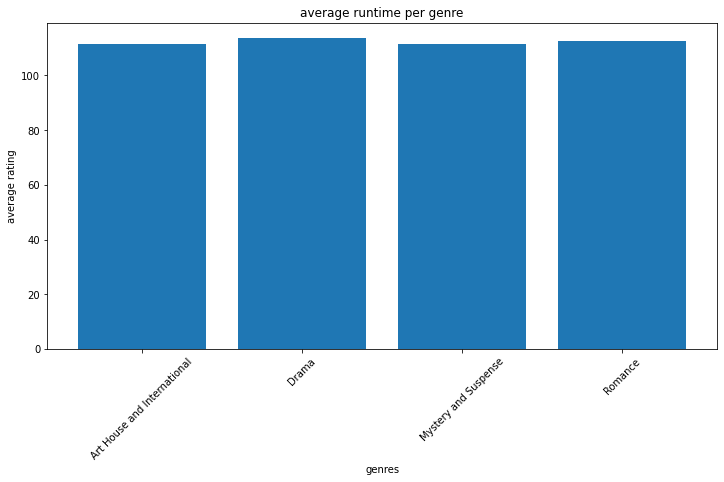

In [93]:
fig, ax2 = plt.subplots(figsize = (12,6))
x2 = avg_runtime_high_rating_genres['genres']
y2 = avg_runtime_high_rating_genres['mean_runtime']
ax2.bar(x2,y2)
ax2.set_title('average runtime per genre')
ax2.set_xlabel('genres')
ax2.set_ylabel('average rating')
plt.xticks(rotation = 45)

----

## Adonis's Data Analysis

In [ ]:
df_gross.head()

In [ ]:
# Find null values
df_gross['domestic_gross'].isnull().value_counts()

In [ ]:
df_gross['foreign_gross'].isnull().value_counts()

In [ ]:
df_gross.info()

In [ ]:
# Remove commas from values & convert to numeric
df_gross['foreign_gross'] = df_gross['foreign_gross'].str.replace(',', '')
df_gross['foreign_gross'] = pd.to_numeric(df_gross['foreign_gross'])
df_gross['foreign_gross'].head() 

In [ ]:
# Remove null values from columns
df_gross.dropna(subset=['studio', 'domestic_gross', 'foreign_gross'], inplace=True)
df_gross.shape

In [ ]:
# Verification of null value deletion
df_gross.info()

**Observations & Insights:**
<ul></ul>
<li>Do the studios that produce the most movies have the highest gross values?

In [ ]:
# Top 10 studios with the most movies
df_gross['studio'].value_counts()[:10]

In [ ]:
x = list(df_gross['studio'].value_counts()[:10].index)
x

In [ ]:
# Top 10 studios domestic gross
dfm2 = df_gross.groupby(['studio']).domestic_gross.sum().reset_index().sort_values(by='domestic_gross', ascending=False)
d = dfm2[dfm2['studio'].isin(x)]

**Observations & Insights:**
<ul></ul>
<li>Data analysis will focus on domestic and foreign gross for titles and studios.

In [ ]:
# Total gross for each film
df_gross['total_gross'] = df_gross['domestic_gross'] + df_gross['foreign_gross']
df_gross.head()

In [ ]:
# Sort by domestic gross
f = df_gross.sort_values(by='domestic_gross', ascending=False)

f.head()

**Observations & Insights:**
<ul></ul>
<li>Some foreign gross values seem wrong for blockbuster films. Are there more?

In [ ]:
# Sort df on foreign gross
g = df_gross.sort_values(by='foreign_gross', ascending=False)
g.head(20)

In [ ]:
# Check for more misreported foreign gross
g.tail(20)

**Observations & Insights:**
<ul></ul>
<li>Foreign gross values for some blockbusters are obviously misreported.
<li>Analysis will focus on domestic markets, as foreign gross values cannot be verified/trusted.

In [ ]:
# Domestic gross per title
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,8))

x1 = f['title'][:10]
y1 = f['domestic_gross'][:10]
ax1.barh(x1, y1)
ax1.set_xlabel("Domestic Gross (hundreds of millions)")
ax1.set_ylabel("Movie Title")
ax1.set_title("Domestic Gross per Movie")


# Domestic gross per studio
dfm3 = df_gross.groupby(['studio']).domestic_gross.sum().reset_index().sort_values(by='domestic_gross', ascending=False)


x2 = dfm3.studio[:10]
y2 = dfm3.domestic_gross[:10]
ax2.barh(x2, y2)
ax2.set_xlabel('Domestic Gross (tens of billions)')
ax2.set_ylabel('Studio')
ax2.set_title('Top 10 Highest Domestic Grossing Studios ')

# Domestic gross for studios with most films
x = ['Uni.', 'Fox', 'WB', 'Sony', 'BV', 'Par.', 'LGF', 'Wein.', 'IFC', 'SPC']


x3 = d['studio']
y3 = d['domestic_gross']
ax3.barh(x3, y3)
ax3.set_xlabel("Domestic Gross (tens of billions)")
ax3.set_ylabel("Studio")
ax3.set_title('Total Domestic Gross for Studio with Most Films')

fig.tight_layout()

**Final Observations & Insights**
<ul>
    <li> From the data we can see that outside of the largest studios (BV, Uni, WB, Fox, Sony), the number of films doesn't correlate with highest domestic gross. As such, we recommend that Microsoft focuses on quality content in Drama, Action and Comedy.
    <li> The highest grossing films are all franchises (Marvel, Jurassic Park, Star Wars, etc). It is highly recommended that any action films made be based upon Microsoft franchises to avoid licensure/copyright fees(this caused issues for Microsoft in the past with potential Halo films).
    <li> Smaller studios such as Weinstein, SPC and IFC could potentially be acquired to acclerate content production.
</ul>

----

# Deja's Data Analysis

In [ ]:
# Display dataframe
display(movie_type)
display(movie_type.info())

**Observations & Insights:**
<ul></ul>
<li>There are 26517 total entries with 0 missing values.
<li>The release date column is the object datatype and should be changed to the datetime datatype.
<li>The production budget, domestic gross, and worldwide gross columns are also object datatypes and should be changed to integer.

In [ ]:
# Show when movies were released
movie_type.sort_values(by='release_date', ascending=False)

In [ ]:
# Filter for movies in English
movie_type= movie_type.loc[movie_type['original_language'] == "en"]
movie_type

In [ ]:
# Condense data to get most voted on movies
movie_type_data= movie_type.loc[movie_type['vote_count'] >= 10000]
movie_type_data

In [ ]:
movie_type_data["genre_ids"].iloc[0]

In [ ]:
# Separate genre ids with multiple values
movie_type_data.genre_ids = movie_type_data.genre_ids.map(lambda x:eval(x))

In [ ]:
movie_type_data = movie_type_data.explode("genre_ids")

In [ ]:
# Filter genres with few votes
movie_type_data= movie_type_data.loc[movie_type_data['genre_ids'] <= 878]
movie_type_data

In [ ]:
movie_type_data["genre_ids"].replace({12: "adventure", 14: "fantasy", 16: "animated", 18: "drama", 27: "horror", 28: "action", 35: "comedy", 36: "history", 37: "western", 53: "thriller", 80: "crime", 878: "sci fi"}, inplace=True)

### James' Data Analysis:

In [ ]:
#setting tconst as index for joining 3 separate dataframes
title_ratings.set_index('tconst', inplace = True)
title_basics.set_index('tconst', inplace =True)

#renamed title_id to tconst to join this data frame into our main data frame
title_akas.rename(columns={'title_id':'tconst'}, inplace=True)
title_akas.set_index('tconst', inplace=True)

#completed first join between title_ratings and title_basics
merged1 = title_ratings.join(title_basics, on='tconst', how='inner')

#completed second join between the above result and title_akas
imdb_data = merged1.join(title_akas, on='tconst', how='inner')

#Since there are lots of missing data and irrelevant data, the data is filtered with only US region
imdb_US_movie = imdb_data[imdb_data['region'] == 'US'].copy()

#sorted in descending order
imdb_US_movie = imdb_US_movie.sort_values(by=['numvotes'], ascending=False).copy()

#dropped all the duplicate titles from the dataframe
imdb_US_movie = imdb_US_movie.drop_duplicates(subset=['original_title'], keep ='first').copy()

#filtered out irrelevant columns in our dataframe
#setting the index to title
imdb_US_movie = imdb_US_movie.set_index('primary_title').copy()
imdb_US_movie = imdb_US_movie[['averagerating', 'numvotes', 'start_year', 'runtime_minutes', 'genres']].copy()
imdb_US_movie.head()

In [ ]:
#the mean vote counts is significantly larger than the median.
#This means the data is extremely skewed right.

mean = imdb_US_movie['numvotes'].mean()
median = imdb_US_movie['numvotes'].median()
print(f'mean is {mean} and median is {median}')

In [ ]:
#We will consider top 10 and top 1 percent of the data
#10 and 1 percentile of vote counts

ten_percentile = imdb_US_movie['numvotes'].quantile(.90)
one_percentile = imdb_US_movie['numvotes'].quantile(.99)

print("top 10 percentile:", round(ten_percentile))
print("top 1 percentile:", round(one_percentile))

In [ ]:
#movies filtered based on the top 10 percentile of vote counts
top_10_percent = imdb_US_movie[(imdb_US_movie['numvotes']>=5795)].reset_index().copy()

#divided up multiple genres for a single movie into a separate row
top_10_percent.loc[:,('genres')] = top_10_percent.loc[:,('genres')].str.split(',')
top_10 = top_10_percent.explode('genres')

#filtered out top 5 genres of movie counts within the 10 percentile
genres_count_10_percent = pd.DataFrame(top_10['genres'].value_counts())
genres_count_10_percent = genres_count_10_percent.head()

#created a table with average number of votes for top five movie genre counts
genres_avgvotes_10 = pd.DataFrame(top_10.groupby('genres')['numvotes'].mean().sort_values(ascending=False))
genres_avgvotes_10 = genres_avgvotes_10.reset_index()
genres_avgvotes_10 = genres_avgvotes_10[genres_avgvotes_10['genres'].isin(['Drama','Comedy','Action','Thriller','Adventure'])]
genres_avgvotes_10.set_index('genres', inplace=True)
genres_avgvotes_10

#joined the movie counts and average number of votes by genre
top10 = genres_count_10_percent.join(genres_avgvotes_10)
top10.rename(columns={'genres':'movie counts'}, inplace=True)
top10

In [ ]:
#Repeated all the steps above to gather top 1 percentile of number of votes
top_1_percent = imdb_US_movie[(imdb_US_movie['numvotes']>=223993)].reset_index().copy()
top_1_percent.loc[:,('genres')] = top_1_percent.loc[:,('genres')].str.split(',')
top_1 = top_1_percent.explode('genres')
genres_count_1percent = pd.DataFrame(top_1['genres'].value_counts())
genres_count_1 = genres_count_1percent.head()
genres_avgvotes_1 = pd.DataFrame(top_1.groupby('genres')['numvotes'].mean().sort_values(ascending=False))
genres_avgvotes_1 = genres_avgvotes_1.reset_index()
genres_avgvotes_1 = genres_avgvotes_1[genres_avgvotes_1['genres'].isin(['Drama','Comedy','Action','Sci-Fi','Adventure'])]
genres_avgvotes_1.set_index('genres', inplace=True)
top1 = genres_count_1.join(genres_avgvotes_1)
top1.rename(columns={'genres':'movie counts'}, inplace=True)
top1

In [ ]:
#style of plots used
plt.style.use('seaborn-darkgrid')
plt.style.use('seaborn-notebook')

In [ ]:
#Two separate bar graphs of top 10 percentile(number of votes) movie genre data
x = np.arange(len(top1.index))
width = 0.6

fig, (ax1, ax2) = plt.subplots(figsize=(11,6), ncols=2, constrained_layout=True)
fig.suptitle("Top Ten Percentile in Vote Counts", fontsize=24)
ax1.bar(x, top10['movie counts'], width)
ax1.set_xticks(x)
ax1.set_xticklabels(top10.index)
ax1.set_title(('Number of Movies in Each Genre'))
ax1.set_xlabel('Movie Genres')
ax1.set_ylabel('Number of Movies')
ax2.bar(x, top10['numvotes'], width)
ax2.set_xticks(x)
ax2.set_xticklabels(top10.index)
ax2.set_title('Average Vote Counts')
ax2.set_xlabel('Movie Genres')
ax2.set_ylabel('Vote Counts');

In [ ]:
##Two separate bar graphs of top 1 percentile(number of votes) movie genre data
x = np.arange(len(top1.index))
width = 0.6

fig, (ax1, ax2) = plt.subplots(figsize=(11,6), ncols=2, constrained_layout=True)
fig.suptitle("Top One Percentile in Vote Counts", fontsize=24)
ax1.bar(x, top1['movie counts'], width)
ax1.set_xticks(x)
ax1.set_xticklabels(top1.index)
ax1.set_title(('Number of Movies in Each Genre'))
ax1.set_xlabel('Movie Genres')
ax1.set_ylabel('Number of Movies')
ax2.bar(x, top1['numvotes'], width)
ax2.set_xticks(x)
ax2.set_xticklabels(top1.index)
ax2.set_title('Average Vote Counts')
ax2.set_xlabel('Movie Genres')
ax2.set_ylabel('Vote Counts');